###  Libraries

In [1]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, dendrogram
import matplotlib.pyplot as plt
import matplotlib as mpl



import os  
import pandas as pd
import numpy as np

In [2]:
def load_features(filepath):
    '''
    INPUT :
    OUTPUT :
    '''
    # read csv file
    df = pd.read_csv(filepath, sep = '\t', encoding = 'utf8', names = ['id', 'word', 'score'])
    grouped = df.groupby("id")
    for name,group in grouped:
        print(name)
        print(group)
    
    
    # transpose df to a tf-idf matrix
    features = df.pivot(index='id', columns='word', values='score') 
    # replace NaN to null
    features = features.fillna(0)
    
    return features

In [3]:
def create_embedding(features, tfidf = False, count = False):
    '''
    INPUT :
    OUTPUT :
    '''
    # Initialize vectorizer
    if tfidf:   
        vec = TfidfVectorizer()
    else:
        vec = CountVectorizer()
        
    # Convert a collection of raw documents to a matrix of TF-IDF features
    embedding = vec.fit_transform(features)
    print("Shape of co-occurence matrix: {}".format(embedding.shape))
    
    
    # Get vocab
    words = vec.get_feature_names()
    weights = np.asarray(embedding.mean(axis=0)).ravel().tolist()
    weights_df = pd.DataFrame({'term': words, 'weight': weights})
    print("Top terms :")
    print(weights_df.sort_values(by='weight', ascending=False).head(20))
    
    return vec, embedding, words

In [19]:
def kmeans(embedding, num_clusters = 5):
    '''
    INPUT :
    OUTPUT :
    '''
    
    wcss=[]
    #this loop will fit the k-means algorithm to our data and 
    #second we will compute the within cluster sum of squares and #appended to our wcss list.
    for i in range(1,11): 
        km = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
        km.fit(embedding)
        wcss.append(km.inertia_) #Sum of squared distances of samples #to their closest cluster center.

    # Plot the elbow graph
    plt.plot(range(1,11),wcss)
    plt.title('The Elbow Method Graph')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
    

    clusters = km.labels_.tolist()
    
    return km, clusters



def top_terms(km, words, num_clusters = 8, num = 5):
    '''
    INPUT :
    OUTPUT :
    '''
    print("Top terms per cluster:")
    order_centroids = km.cluster_centers_.argsort()[:, ::-1]

    for i in range(num_clusters):
        top_five_words = [words[ind] for ind in order_centroids[i, :num]]
        print("Cluster {}: {}".format(i, ' '.join(top_five_words)))
        
    return order_centroids



def scaling(dist):
    '''
    INPUT :
    OUTPUT :
    '''
    MDS()
    # convert two components as we're plotting points in a two-dimensional plane
    # "precomputed" because we provide a distance matrix
    # we will also specify `random_state` so the plot is reproducible.
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
    pos = mds.fit_transform(dist)  # shape (n_components, n_samples)
    xs, ys = pos[:, 0], pos[:, 1]
    
    return xs, ys

### Load features

In [20]:
bm25 = load_features("output/bm25.csv")
bm25

20180802_bsvmaraichage_19_cle04c2cf
                                      id          word     score
916  20180802_bsvmaraichage_19_cle04c2cf      roquette  8.212071
917  20180802_bsvmaraichage_19_cle04c2cf        panais  5.369718
918  20180802_bsvmaraichage_19_cle04c2cf         radis  5.321991
919  20180802_bsvmaraichage_19_cle04c2cf         noyer  4.553552
920  20180802_bsvmaraichage_19_cle04c2cf     concombre  4.473946
921  20180802_bsvmaraichage_19_cle04c2cf      fraisier  4.365042
922  20180802_bsvmaraichage_19_cle04c2cf        laitue  4.339266
923  20180802_bsvmaraichage_19_cle04c2cf         mâche  4.137006
924  20180802_bsvmaraichage_19_cle04c2cf       asperge  4.019090
925  20180802_bsvmaraichage_19_cle04c2cf         melon  3.716611
926  20180802_bsvmaraichage_19_cle04c2cf     aubergine  3.634584
927  20180802_bsvmaraichage_19_cle04c2cf       poireau  3.363493
928  20180802_bsvmaraichage_19_cle04c2cf       carotte  3.331050
929  20180802_bsvmaraichage_19_cle04c2cf        oignon

847  bsv_grandes_cultures_n10_22112018_cle815c16           Culture -5.199620
bsv_grandes_cultures_n35_09082018-2_cle06f22b
                                                id  \
848  bsv_grandes_cultures_n35_09082018-2_cle06f22b   
849  bsv_grandes_cultures_n35_09082018-2_cle06f22b   
850  bsv_grandes_cultures_n35_09082018-2_cle06f22b   
851  bsv_grandes_cultures_n35_09082018-2_cle06f22b   
852  bsv_grandes_cultures_n35_09082018-2_cle06f22b   
853  bsv_grandes_cultures_n35_09082018-2_cle06f22b   
854  bsv_grandes_cultures_n35_09082018-2_cle06f22b   
855  bsv_grandes_cultures_n35_09082018-2_cle06f22b   
856  bsv_grandes_cultures_n35_09082018-2_cle06f22b   

                              word     score  
848                  colza d'hiver  7.429958  
849                           soja  5.464560  
850  légume à graines ou à gousses  4.891676  
851                         sorgho  4.651267  
852                   sorgho grain  4.651267  
853                        semence  2.035597  
854    

word,Chou cabus blanc,Culture,abricotier,abricotier pays,agrume,ail,amandier,ananas,arboriculture,arboriculture fruitière,...,tomate,tournesol,triticale,trèfle,vigne,vigne de cuve,vigne de table,zone non agricole,échalote,épinard
id,,,,,,,,,,,,,,,,,,,,,
20180802_bsvmaraichage_19_cle04c2cf,0.0,-4.575287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.910674,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
20180911_bsv_grandes_cultures-26_cle0f15a8,0.0,-5.227230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,1.968161,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
20180920_bsvmaraichage_cle0649bf,0.0,-4.760270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.803465,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
20181002_bsv_grandes_cultures_29_cle0423a6,0.0,-5.145126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
20181011_bsvmaraichage_27_cle09c363,0.0,-4.894259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.690543,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bsv_viti_mp_gaillac_n18_30072019_cle0fe8aa,0.0,-5.180765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,2.198931,0.0,0.0,1.204245,2.631326,0.0,4.747544,0.0,0.0
char_gdes_Cultures_no11_du_30-04-19_cle096f9c,0.0,-5.125511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,2.209279,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
char_gdes_Cultures_no14_du_22-05-19_cle0b1586,0.0,-4.916834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,1.862232,0.0,0.0,0.000000,0.000000,0.0,3.923785,0.0,0.0


### Kmeans

In [21]:
vec, embedding, words = create_embedding(bm25, tfidf = True)

Shape of co-occurence matrix: (174, 180)
Top terms :
              term    weight
35            chou  0.037488
53              de  0.030265
85           hiver  0.023368
49         culture  0.022664
20             blé  0.019668
131           pois  0.019587
99            maïs  0.017110
113           orge  0.016489
143   protéagineux  0.016426
33        chicorée  0.016383
111     oléagineux  0.016262
93             lin  0.016262
91          laitue  0.016017
74        féverole  0.013768
163         sorgho  0.013471
52         céréale  0.013471
51          céleri  0.013308
142      printemps  0.013100
7    arboriculture  0.012969
83         haricot  0.012710


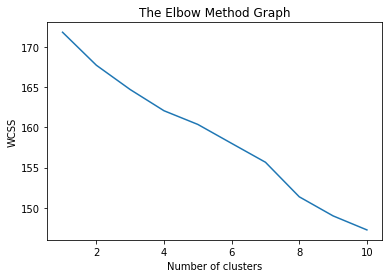

Top terms per cluster:
Cluster 0: pois protéagineux haricot betterave persil
Cluster 1: de féverole printemps vigne pomme
Cluster 2: chou cabus de fleur brocoli
Cluster 3: arboriculture fruitière culture tropicale épinard
Cluster 4: oléagineux lin hiver printemps de
Cluster 5: maïs laitue sorgho céleri abricotier
Cluster 6: céréale paille fourragère épinard dur
Cluster 7: culture légumière grande fourragère plein


In [22]:
# apply kmeans on matrix
km, clusters = kmeans(embedding)
order_centroids = top_terms(km, words)

In [23]:
# test model
km.predict(vec.transform(["vigne", "pois"]))

array([5, 0], dtype=int32)

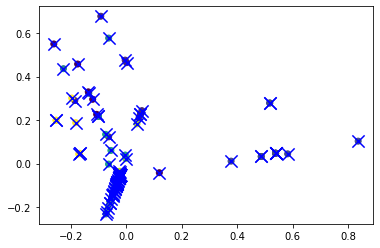

In [24]:
# Dimensionality reduction using PCA, reduce the tfidf matrix to just 2 features
X = embedding.todense()
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1], c=km.predict(embedding))
plt.scatter(X_pca[:, 0], X_pca[:,1], marker='x', s=150, c='b')

### MDS

In [25]:
dist = 1 - cosine_similarity(embedding)
xs, ys = scaling(dist)

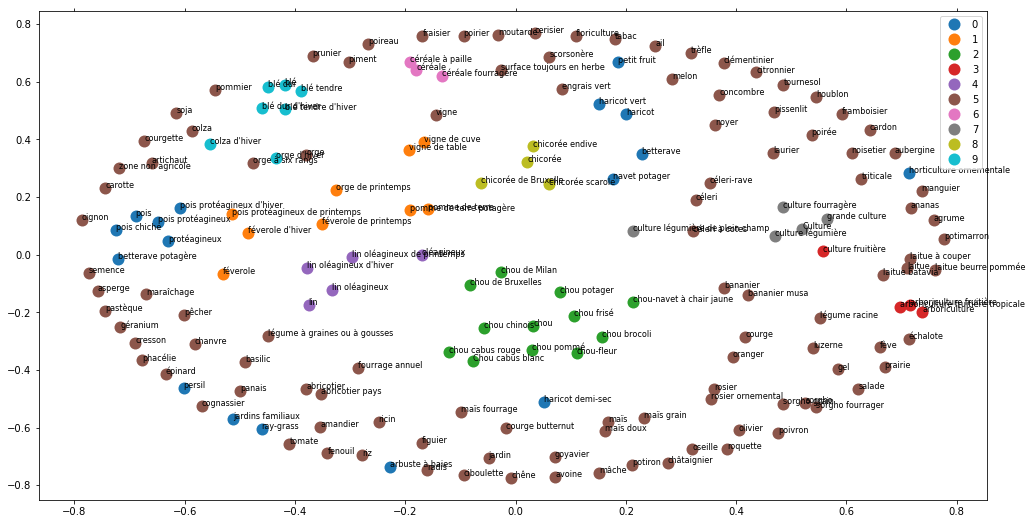

In [26]:
%matplotlib inline 

cluster_names = {0: 'Cluster 0',
                 1: 'Cluster 1',
                 2: 'Cluster 2',
                 3: 'Cluster 3',
                 4: 'Cluster 4',
                 5: 'Cluster 5',
                 6: 'Cluster 6',
                 7: 'Cluster 7'}

labels = list(bm25.keys())
groups = { 'word': labels, 'cluster': clusters,}
frame = pd.DataFrame(groups, index = [clusters] , columns = ['word', 'cluster'])


#create data frame that has the result of the MDS plus the cluster numbers and titles
dff = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=labels)) 

#group by cluster
groups = dff.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling



#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=name,
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the title
for i in range(len(dff)):
    ax.text(dff.loc[i]['x'], dff.loc[i]['y'], dff.loc[i]['title'], size=8)  

    
    
plt.show()

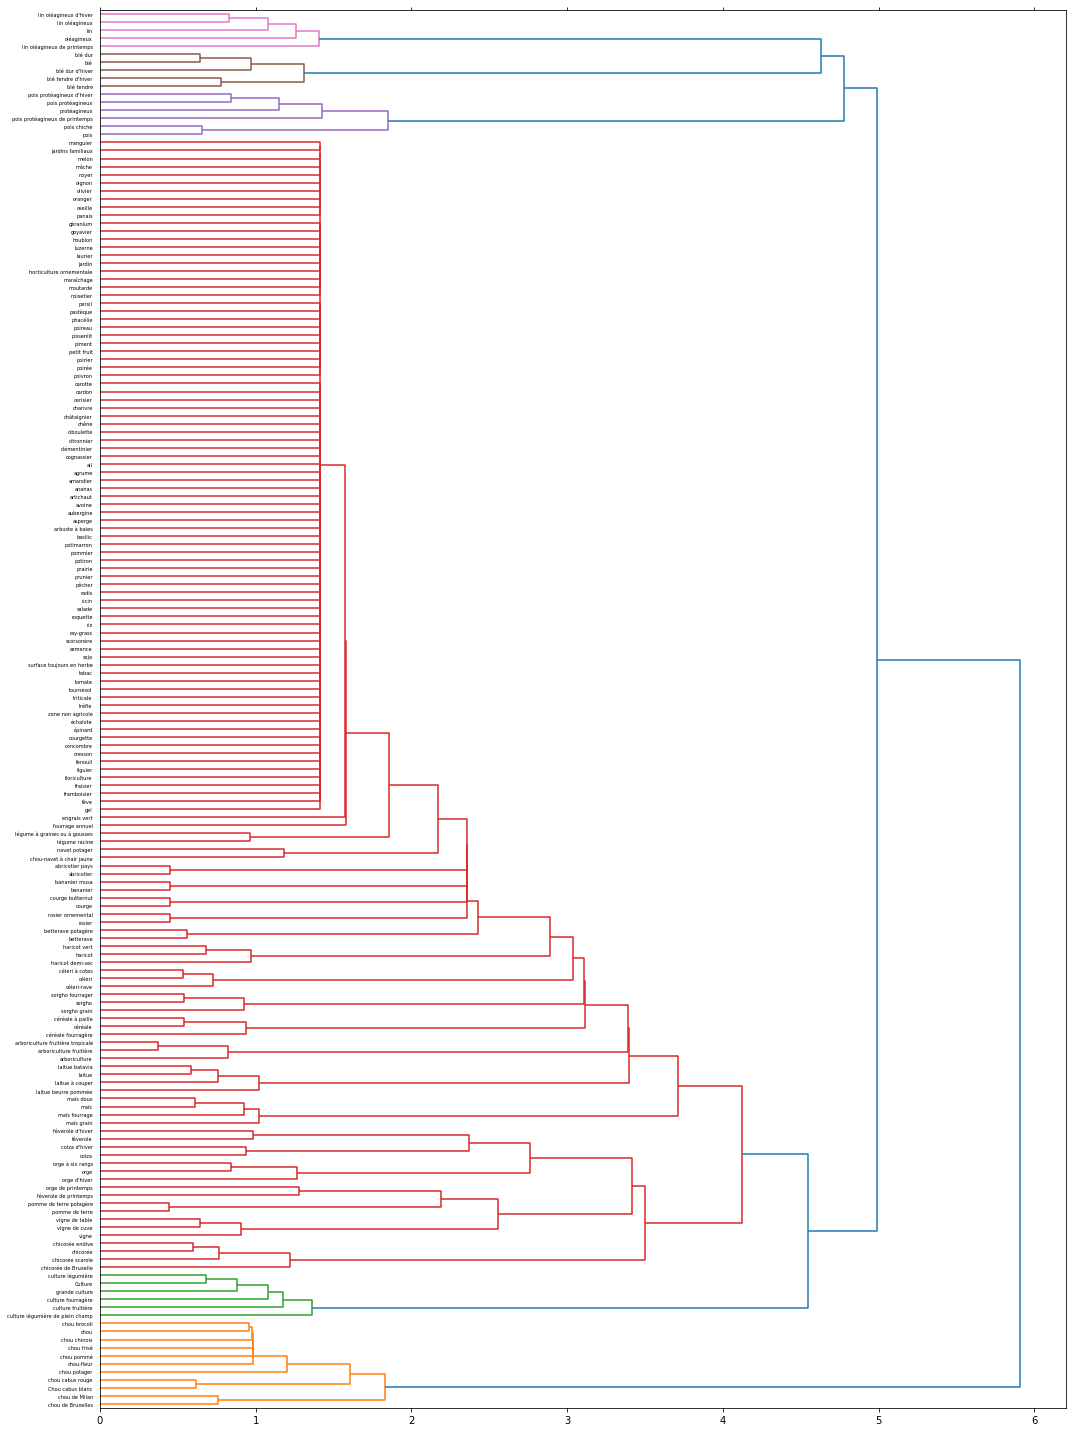

In [17]:
linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=labels);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters_okapi.png', dpi=200) #save figure as ward_clusters